In [24]:
#Marie Wothe; Homework 5 - Matplotlib

%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride = pd.merge(ride_data, city_data,
                                 how='left', on='city')

# Display the data table for preview
city_ride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [60]:
#Series for Urban drivers - average fare, ride count, and total drivers
urban_ride = city_ride[city_ride.type=="Urban"].groupby("city")["ride_id"].count()
urban_drivers = city_ride[city_ride.type=="Urban"].groupby("city")["driver_count"].mean()
urban_fare = city_ride[city_ride.type=="Urban"].groupby("city")["fare"].mean()

#make Dataframe
urban_series = [urban_ride, urban_drivers, urban_fare]
urban_df = pd.DataFrame(urban_series)
urban_df = urban_df.transpose()

#Rename Columns
urban_df = urban_df.rename(columns=\
                           {"ride_id":"Urban Ride Count","driver_count":"Total Drivers","fare":"Average Fare"})
urban_df.head()

,Urban Ride Count,Total Drivers,Average Fare
city,,,
Amandaburgh,18.0,12.0,24.641667
Barajasview,22.0,26.0,25.332273
Carriemouth,27.0,52.0,28.314444
Christopherfurt,27.0,41.0,24.501852
Deanville,19.0,49.0,25.842632


In [58]:
#Dataframe for Suburban Drivers
#Series for suburban drivers - average fare, ride count, and total drivers
sub_ride = city_ride[city_ride.type=="Suburban"].groupby("city")["ride_id"].count()
sub_drivers = city_ride[city_ride.type=="Suburban"].groupby("city")["driver_count"].mean()
sub_fare = city_ride[city_ride.type=="Suburban"].groupby("city")["fare"].mean()

#make Dataframe
sub_series = [sub_ride, sub_drivers, sub_fare]
sub_df = pd.DataFrame(sub_series)
sub_df = sub_df.transpose()

#Rename Columns
sub_df = sub_df.rename(columns=\
                           {"ride_id":"Suburban Ride Count","driver_count":"Total Drivers","fare":"Average Fare"})
sub_df.head()

,Suburban Ride Count,Total Drivers,Average Fare
city,,,
Barronchester,16.0,11.0,36.422500
Bethanyland,18.0,22.0,32.956111
Brandonfort,19.0,10.0,35.437368
Colemanland,22.0,23.0,30.894545
Davidfurt,17.0,23.0,31.995882


In [71]:
#Dataframe for Rural Drivers
#Series for rural drivers - average fare, ride count, and total drivers
rural_ride = city_ride[city_ride.type=="Rural"].groupby("city")["ride_id"].count()
rural_drivers = city_ride[city_ride.type=="Rural"].groupby("city")["driver_count"].mean()
rural_fare = city_ride[city_ride.type=="Rural"].groupby("city")["fare"].mean()

#make Dataframe
rural_series = [rural_ride, rural_drivers, rural_fare]
rural_df = pd.DataFrame(rural_series)
rural_df = rural_df.transpose()

#Rename Columns
rural_df = rural_df.rename(columns=\
                           {"ride_id":"Rural Ride Count","driver_count":"Total Drivers","fare":"Average Fare"})
rural_df.head()

,Rural Ride Count,Total Drivers,Average Fare
city,,,
Bradshawfurt,10.0,7.0,40.064000
Garzaport,3.0,7.0,24.123333
Harringtonfort,6.0,4.0,33.470000
Jessicaport,6.0,1.0,36.013333
Lake Jamie,6.0,4.0,34.358333


## Bubble Plot of Ride Sharing Data

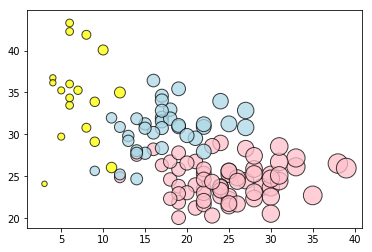

In [119]:
# Obtain the x and y coordinates for each of the three city types

x_axis_u = urban_df["Urban Ride Count"]
y_axis_u = urban_df["Average Fare"]

x_axis_s = sub_df["Suburban Ride Count"]
y_axis_s = sub_df["Average Fare"]

x_axis_r = rural_df["Rural Ride Count"]
y_axis_r = rural_df["Average Fare"]

# Build the scatter plots for each city types
urban_fig = plt.scatter(x_axis_u, y_axis_u, marker="o", facecolors="pink", edgecolors="black",
            s=x_axis_u*10, alpha=0.75)

sub_fig= plt.scatter(x_axis_s, y_axis_s, marker="o", facecolors="lightblue", edgecolors="black",
            s=x_axis_s*10, alpha=0.75)

rural_fig = plt.scatter(x_axis_r, y_axis_r, marker="o", facecolors="yellow", edgecolors="black",
            s=x_axis_r*10, alpha=0.75)

# Incorporate the other graph properties
#add grid, make handles, add axis titles and the side note
# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

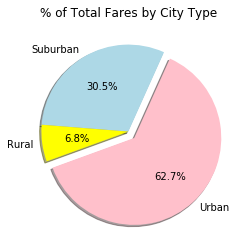

In [105]:
# Calculate Type Percents
total_fare = city_ride["fare"].sum()

#Calculate city type totals
urban_total = city_ride[city_ride.type=="Urban"]["fare"].sum()
sub_total = city_ride[city_ride.type=="Suburban"]["fare"].sum()
rural_total = city_ride[city_ride.type=="Rural"]["fare"].sum()

#urban_fare = round(/total_ride*100, 2)
urban_fare = round(urban_total/total_ride*100, 2)
sub_fare = round(sub_total/total_ride*100, 2)
rural_fare = round(rural_total/total_ride*100, 2)

percent_fare = [urban_fare, sub_fare, rural_fare]

explode= [0.1, 0, 0]
labels = ["Urban", "Suburban", "Rural"]
colors = ["pink", "lightblue", "yellow"]

# Build Pie Chart
plt.title("% of Total Fares by City Type")
fare_fig = plt.pie(percent_fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)
# Save Figure
#plt.savefig("../Images/RideCountPercents.png")

In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

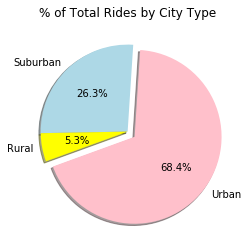

In [106]:
# Calculate Ride Percents
total_ride = urban_df["Urban Ride Count"].sum() + sub_df["Suburban Ride Count"].sum()\
            + rural_df["Rural Ride Count"].sum()

#Percent list to hold values

urban_perc = round(urban_df["Urban Ride Count"].sum()/total_ride*100, 2)
sub_perc = round(sub_df["Suburban Ride Count"].sum()/total_ride*100, 2)
rural_perc = round(rural_df["Rural Ride Count"].sum()/total_ride*100, 2)

Percent_ls = [urban_perc, sub_perc, rural_perc]


explode= [0.1, 0, 0]
labels = ["Urban", "Suburban", "Rural"]
colors = ["pink", "lightblue", "yellow"]

# Build Pie Chart
plt.title("% of Total Rides by City Type")
ride_fig = plt.pie(Percent_ls, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)

# Save Figure
#plt.savefig("../Images/RideCountPercents.png")

In [107]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents
total_drivers = urban_df["Total Drivers"].sum() + sub_df["Total Drivers"].sum() + rural_df["Total Drivers"].sum()
total_drivers

# Build Pie Charts
Labels = ["Urban", "Suburban", "Rural"]
colors = ["pink", "blue", "yellow"]
# Save Figure


In [ ]:
# Show Figure
plt.show()